<a href="https://colab.research.google.com/github/AustinAlgebra/MNISTFashion_ANN/blob/main/MNISTFashion_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

from [zalandoresearch on GitHub](https://github.com/zalandoresearch/fashion-mnist):

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.


---



My goal with this dataset is to explore some different parameters of Artificial Neural Networks (ANNs) and see what kinds of accuracy scores I can achieve.




In [ ]:
#@title
# May need to install tensorflow
#!pip install tensorflow-gpu==2.0.0-rc1

In [ ]:
# Using this to show images
from PIL import Image

# The Usual Suspects
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt

# Will be comparing runtime as we go
import time

# Tensorflow / Keras packages
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist

import warnings
warnings.filterwarnings("ignore")

# Loading the Images

In [ ]:
# Loading the Fashion MNIST with Keras
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Let's see what kind of data we are working with
print(f'Data type: {type(x_train)}')
print(f'Data dimensions: {x_train.shape}')

Data type: <class 'numpy.ndarray'>
Data dimensions: (60000, 28, 28)


In [ ]:
# Create a function to process and reshape the data
def ReshapeImages(X):
  rows = X.shape[0]
  columns = X.shape[1]*X.shape[2]
  X = X.reshape(rows, columns)
  X = X.astype('float32')
  X = X/255.0
  return X

In [ ]:
X_train = ReshapeImages(x_train)
X_test = ReshapeImages(x_test)

In [ ]:
pd.DataFrame(y_train).value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [ ]:
pd.DataFrame(y_test).value_counts()

9    1000
8    1000
7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
1    1000
0    1000
dtype: int64

## Viewing Some Images

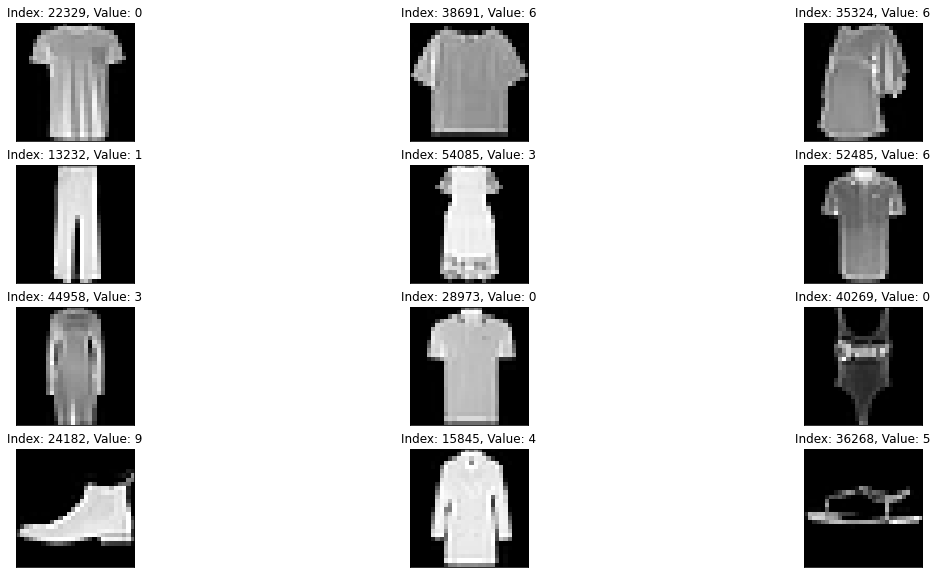

In [ ]:
plt.figure(figsize=(20,10))

for i in range (0,12):
  plt.subplot(4,3,i+1)
  index = np.random.randint(0, X_train.shape[0], 12)
  plt.imshow(np.array(X_train[index[i]]).reshape(28,28), cmap="gray")
  plt.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # Remove left ticks
    right=False,       # Remove right ticks
    labelleft=False,   # Remove labels along left axis
    labelbottom=False) # labels along the bottom edge are off
  plt.title(f"Index: {index[i]}, Value: {y_train[index[i]]}")

plt.show()

|Label	|Description |
|---|---|
0	|T-shirt/top
1	|Trouser
2	|Pullover
3	|Dress
4	|Coat
5	|Sandal
6	|Shirt
7	|Sneaker
8	|Bag
9	|Ankle boot

# Running ANNs

In [ ]:
from tensorflow.keras.utils import to_categorical

output_dim = nb_classes = 10
batch_size = 128

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

### Baseline: Learning Rate = | Batch Size = 128 | Loss Function = CrossEntropy || ReLU - 32 | ReLU - 16 | Softmax - 10

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(32, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(16, activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.8237 - accuracy: 0.3512
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.8333 - accuracy: 0.7291
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6695 - accuracy: 0.7703
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6068 - accuracy: 0.7928
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.8115
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5304 - accuracy: 0.8166
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5125 - accuracy: 0.8220
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4984 - accuracy: 0.8284
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4839 - accuracy: 0.8314
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4819 - accuracy: 0.8317

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.4635976552963257
Test accuracy: 0.8346999883651733


* Training score: 0.8528
* Test score: 0.4554731845855713
* Test accuracy: 0.840499997138977

## Number of Layers

### 6 Layers 
* ### Batch Size = 128
* ### Layers:
1. ReLU - 1024
2. ReLU - 512
3. ReLU - 256
4. ReLU - 128 
5. ReLU - 64
6. Softmax - 10

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(512, activation="relu"))
# The third dense layer
model.add(Dense(256, activation="relu"))
# The fourth dense layer
model.add(Dense(128, activation="relu"))
# The five dense layer
model.add(Dense(64, activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 11s 23ms/step - loss: 1.5135 - accuracy: 0.5179
Epoch 2/20
469/469 [==============================] - 11s 23ms/step - loss: 0.6165 - accuracy: 0.7844
Epoch 3/20
469/469 [==============================] - 11s 23ms/step - loss: 0.5261 - accuracy: 0.8143
Epoch 4/20
469/469 [==============================] - 11s 24ms/step - loss: 0.4751 - accuracy: 0.8316
Epoch 5/20
469/469 [==============================] - 11s 23ms/step - loss: 0.4420 - accuracy: 0.8447
Epoch 6/20
469/469 [==============================] - 11s 24ms/step - loss: 0.4187 - accuracy: 0.8537
Epoch 7/20
469/469 [==============================] - 11s 24ms/step - loss: 0.4017 - accuracy: 0.8584
Epoch 8/20
469/469 [==============================] - 11s 24ms/step - loss: 0.3877 - accuracy: 0.8622
Epoch 9/20
469/469 [==============================] - 11s 23ms/step - loss: 0.3741 - accuracy: 0.8684
Epoch 10/20
469/469 [==============================] - 11s 23ms/step - loss: 0.377

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.35612183809280396
Test accuracy: 0.8687000274658203


* Training score: .8939
* Test score: 0.35612183809280396
* Test accuracy: 0.8687000274658203

### 10 Layers 
* ### Batch Size = 128
* ### Layers:
1. ReLU - 2048
2. ReLU - 1024
3. ReLU - 512
4. ReLU - 256 
5. ReLU - 128
6. ReLU - 64
7. ReLU - 32
8. ReLU - 16
9. ReLU - 10
10. Softmax - 10

In [ ]:
model = Sequential()

# Layer 1
model.add(Dense(2048, input_shape=(784,), activation="relu"))
# Layer 2
model.add(Dense(1024, activation="relu"))
# Layer 3
model.add(Dense(512, activation="relu"))
# Layer 4
model.add(Dense(256, activation="relu"))
# Layer 5
model.add(Dense(128, activation="relu"))
# Layer 6
model.add(Dense(64, activation="relu"))
# Layer 7
model.add(Dense(32, activation="relu"))
# Layer 8
model.add(Dense(16, activation="relu"))
# Layer 9
model.add(Dense(10, activation="relu"))
# Layer 10: Output Layer
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 40s 83ms/step - loss: 2.0093 - accuracy: 0.2588
Epoch 2/20
469/469 [==============================] - 39s 84ms/step - loss: 0.8625 - accuracy: 0.6590
Epoch 3/20
469/469 [==============================] - 39s 84ms/step - loss: 0.6552 - accuracy: 0.7622
Epoch 4/20
469/469 [==============================] - 39s 84ms/step - loss: 0.5544 - accuracy: 0.8002
Epoch 5/20
469/469 [==============================] - 39s 84ms/step - loss: 0.4944 - accuracy: 0.8276
Epoch 6/20
469/469 [==============================] - 40s 84ms/step - loss: 0.4510 - accuracy: 0.8424
Epoch 7/20
469/469 [==============================] - 39s 84ms/step - loss: 0.4213 - accuracy: 0.8476
Epoch 8/20
469/469 [==============================] - 40s 85ms/step - loss: 0.3874 - accuracy: 0.8600
Epoch 9/20
469/469 [==============================] - 40s 84ms/step - loss: 0.3662 - accuracy: 0.8675
Epoch 10/20
469/469 [==============================] - 40s 85ms/step - loss: 0.352

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.38328394293785095
Test accuracy: 0.8659999966621399


* Training score: 0.9145
* Test score: 0.38328394293785095
* Test accuracy: 0.8659999966621399

### Results

| Layers | Loss | Training Accuracy | Test Accuracy |
|---|---|---|---|
| 3 | 0.4554 | 0.8528 | 0.8404 |
| 6 | 0.3561 | 0.8939 | 0.8687 |
| 10 | 0.3832 | 0.9145 | 0.8659 |

You can see that training accuracy improved with more layers, but test accuracy plateaued.

## 2. Activation Functions

### tanh

In [ ]:
model = Sequential()

# The first dense layer
model.add(Dense(128, input_shape=(784,), activation="tanh"))

# The second dense layer
model.add(Dense(64, activation="tanh"))

# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

# Compiling
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fitting the model
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 1.3633 - accuracy: 0.5765
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.6796 - accuracy: 0.7775
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5797 - accuracy: 0.8069
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5345 - accuracy: 0.8148
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5004 - accuracy: 0.8272
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4819 - accuracy: 0.8306
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4607 - accuracy: 0.8387
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4452 - accuracy: 0.8421
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4423 - accuracy: 0.8436
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4231 - accuracy: 0.8502

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.40956875681877136
Test accuracy: 0.8536999821662903


### sigmoid

In [ ]:
model = Sequential()

# The first dense layer
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))

# The second dense layer
model.add(Dense(64, activation="sigmoid"))

# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

# Compile with categorical crossentropy and accuracy metric
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fitting the model
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 2.3113 - accuracy: 0.1868
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 2.1681 - accuracy: 0.5215
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 2.0003 - accuracy: 0.6097
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 1.7827 - accuracy: 0.5900
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 1.5911 - accuracy: 0.5900
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 1.4385 - accuracy: 0.6113
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 1.3224 - accuracy: 0.6330
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 1.2258 - accuracy: 0.6503
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 1.1425 - accuracy: 0.6663
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 1.0721 - accuracy: 0.6821

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.734932005405426
Test accuracy: 0.7382000088691711


### Results

| Activation Function | Loss | Training Accuracy | Test Accuracy |
| --- | --- | --- | --- |
| ReLU | 0.4554 | 0.8528 | 0.8404 |
| tanh | 0.4095 | 0.8543 | 0.8536 |
| sigmoid | 0.7349 | 0.7467 | 0.7382 |

tanh seems to perform slightly better and have less loss for just 3 layers. Let's try tanh with 6 layers

### 6 layers of tanh

In [ ]:
model = Sequential()

# Layer 1
model.add(Dense(1024, input_shape=(784,), activation="tanh"))

# Layer 2
model.add(Dense(512, activation="tanh"))

# Layer 3
model.add(Dense(256, activation="tanh"))

# Layer 4
model.add(Dense(128, activation="tanh"))

# Layer 5
model.add(Dense(64, activation="tanh"))

# Layer 6: output layer
model.add(Dense(10, activation="softmax"))

# Compiling
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fitting the model
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 13s 27ms/step - loss: 1.0573 - accuracy: 0.6672
Epoch 2/20
469/469 [==============================] - 12s 26ms/step - loss: 0.5418 - accuracy: 0.8174
Epoch 3/20
469/469 [==============================] - 12s 27ms/step - loss: 0.4737 - accuracy: 0.8350
Epoch 4/20
469/469 [==============================] - 12s 27ms/step - loss: 0.4349 - accuracy: 0.8475
Epoch 5/20
469/469 [==============================] - 12s 27ms/step - loss: 0.4180 - accuracy: 0.8523
Epoch 6/20
469/469 [==============================] - 12s 27ms/step - loss: 0.3988 - accuracy: 0.8584
Epoch 7/20
469/469 [==============================] - 12s 27ms/step - loss: 0.3915 - accuracy: 0.8588
Epoch 8/20
469/469 [==============================] - 12s 27ms/step - loss: 0.3810 - accuracy: 0.8643
Epoch 9/20
469/469 [==============================] - 12s 27ms/step - loss: 0.3659 - accuracy: 0.8686
Epoch 10/20
469/469 [==============================] - 13s 27ms/step - loss: 0.366

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.4027322232723236
Test accuracy: 0.8478000164031982


That does not beat ReLU with 6 layers.

## 4. Batch Size

### Batch Size = 16
* Layers: 
1. ReLU - 128 Neurons
2. ReLU - 64 Neurons
3. Softmax - 10 Neurons

In [ ]:
# Using Sequential API
model = Sequential()

# The first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))

# The second dense layer
model.add(Dense(64, activation="relu"))

# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

# Compile with the Loss Function and use Accuracy as the data is balanced
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model over 20 epochs
model.fit(X_train, Y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
3750/3750 [==============================] - 6s 1ms/step - loss: 0.8673 - accuracy: 0.7144
Epoch 2/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.4730 - accuracy: 0.8358
Epoch 3/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.4164 - accuracy: 0.8540
Epoch 4/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.3829 - accuracy: 0.8646
Epoch 5/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.3663 - accuracy: 0.8694
Epoch 6/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.3489 - accuracy: 0.8725
Epoch 7/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.3323 - accuracy: 0.8809
Epoch 8/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.3217 - accuracy: 0.8838
Epoch 9/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.3101 - accuracy: 0.8875
Epoch 10/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.298

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.33494657278060913
Test accuracy: 0.8852999806404114


* Train accuracy: 0.9142
* Test score: 0.33494657278060913
* Test accuracy: 0.8852999806404114

### Batch Size = 8
* Layers: 
1. ReLU - 128 Neurons
2. ReLU - 64 Neurons
3. Softmax - 10 Neurons

In [ ]:
# Using Sequential API
model = Sequential()

# The first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))

# The second dense layer
model.add(Dense(64, activation="relu"))

# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

# Compile with the Loss Function and use Accuracy as the data is balanced
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model over 20 epochs
model.fit(X_train, Y_train, batch_size=8, epochs=20, verbose=1)

Epoch 1/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.7584 - accuracy: 0.7372
Epoch 2/20
7500/7500 [==============================] - 11s 1ms/step - loss: 0.4308 - accuracy: 0.8463
Epoch 3/20
7500/7500 [==============================] - 11s 1ms/step - loss: 0.3793 - accuracy: 0.8637
Epoch 4/20
7500/7500 [==============================] - 11s 1ms/step - loss: 0.3540 - accuracy: 0.8731
Epoch 5/20
7500/7500 [==============================] - 11s 1ms/step - loss: 0.3359 - accuracy: 0.8780
Epoch 6/20
7500/7500 [==============================] - 11s 1ms/step - loss: 0.3141 - accuracy: 0.8853
Epoch 7/20
7500/7500 [==============================] - 11s 1ms/step - loss: 0.2992 - accuracy: 0.8905
Epoch 8/20
7500/7500 [==============================] - 11s 1ms/step - loss: 0.2893 - accuracy: 0.8929
Epoch 9/20
7500/7500 [==============================] - 11s 1ms/step - loss: 0.2789 - accuracy: 0.8984
Epoch 10/20
7500/7500 [==============================] - 11s 1ms/step - l

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3331048786640167
Test accuracy: 0.8822000026702881


### Results

| Batch Size | Loss | Training Accuracy | Test Accuracy |
| --- | --- | --- | --- |
| 128 | 0.4554 | 0.8528 | 0.8404 |
| 16 | 0.3349 | 0.9142 | 0.8852 |
| 8 | 0.3331 | 0.9246 | 0.8822 |

It looks like batch size of 8 has a higher training accuracy and similar loss to batch size of 16. Batch size of 16 has a better test accuracy and is quite a bit faster, so might be a better choice. Let's try that with 6 layers.

#### Batch size = 16, ReLU, 6 layers

In [ ]:
model = Sequential()
# The first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(512, activation="relu"))
# The third dense layer
model.add(Dense(256, activation="relu"))
# The fourth dense layer
model.add(Dense(128, activation="relu"))
# The five dense layer
model.add(Dense(64, activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
3750/3750 [==============================] - 34s 9ms/step - loss: 0.8502 - accuracy: 0.7089
Epoch 2/20
3750/3750 [==============================] - 33s 9ms/step - loss: 0.4092 - accuracy: 0.8507
Epoch 3/20
3750/3750 [==============================] - 33s 9ms/step - loss: 0.3509 - accuracy: 0.8714
Epoch 4/20
3750/3750 [==============================] - 34s 9ms/step - loss: 0.3205 - accuracy: 0.8814
Epoch 5/20
3750/3750 [==============================] - 34s 9ms/step - loss: 0.3040 - accuracy: 0.8892
Epoch 6/20
3750/3750 [==============================] - 34s 9ms/step - loss: 0.2781 - accuracy: 0.8968
Epoch 7/20
3750/3750 [==============================] - 36s 10ms/step - loss: 0.2671 - accuracy: 0.9002
Epoch 8/20
3750/3750 [==============================] - 34s 9ms/step - loss: 0.2531 - accuracy: 0.9052
Epoch 9/20
3750/3750 [==============================] - 34s 9ms/step - loss: 0.2375 - accuracy: 0.9119
Epoch 10/20
3750/3750 [==============================] - 34s 9ms/step - 

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.33024516701698303
Test accuracy: 0.8895999789237976


### Best Results:

The best results I have achieved so far are a test accuracy of .8895

In [ ]:
from tensorflow.keras import optimizers

model = Sequential()

# The first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))

# The second dense layer
model.add(Dense(512, activation="relu"))

# The third dense layer
model.add(Dense(256, activation="relu"))

# The fourth dense layer
model.add(Dense(128, activation="relu"))

# The five dense layer
model.add(Dense(64, activation="relu"))

# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

# Compile layers with optimizer and learninngrate = .01
model.compile(optimizer=optimizers.SGD(lr=0.01), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fitting the model, batch size =16
model.fit(X_train, 
          Y_train, 
          batch_size=16, 
          epochs=20, 
          verbose=1)

Epoch 1/20
3750/3750 [==============================] - 35s 9ms/step - loss: 0.8404 - accuracy: 0.7144
Epoch 2/20
3750/3750 [==============================] - 34s 9ms/step - loss: 0.4117 - accuracy: 0.8535
Epoch 3/20
3750/3750 [==============================] - 34s 9ms/step - loss: 0.3543 - accuracy: 0.8705
Epoch 4/20
3750/3750 [==============================] - 34s 9ms/step - loss: 0.3254 - accuracy: 0.8801
Epoch 5/20
3750/3750 [==============================] - 34s 9ms/step - loss: 0.3003 - accuracy: 0.8881
Epoch 6/20
3750/3750 [==============================] - 34s 9ms/step - loss: 0.2808 - accuracy: 0.8958
Epoch 7/20
3750/3750 [==============================] - 34s 9ms/step - loss: 0.2644 - accuracy: 0.9001
Epoch 8/20
3750/3750 [==============================] - 34s 9ms/step - loss: 0.2568 - accuracy: 0.9051
Epoch 9/20
3750/3750 [==============================] - 34s 9ms/step - loss: 0.2428 - accuracy: 0.9080
Epoch 10/20
3750/3750 [==============================] - 34s 9ms/step - l

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.36863377690315247
Test accuracy: 0.8845999836921692


Okay the first pass at tweaking the learning rate had similar results. I would be interested in comparing these results to a random forest or even logistic regression just to see how much better these models are. I would also like to try the Leaky ReLU and PReLU, which I haven't experimented with yet.